In [1]:
import matplotlib.pyplot as plt
import handcalcs.render
import math

PI = math.pi

In [2]:
# Исходные данные:

P_a = 600    # Мощность, Квт
t_h = 10000  # Время работы, ч
n_a = 6000  # Частота вращения на входе
n_h = 1700   # Частота вращения на выходе

U = 3.5294117647058822


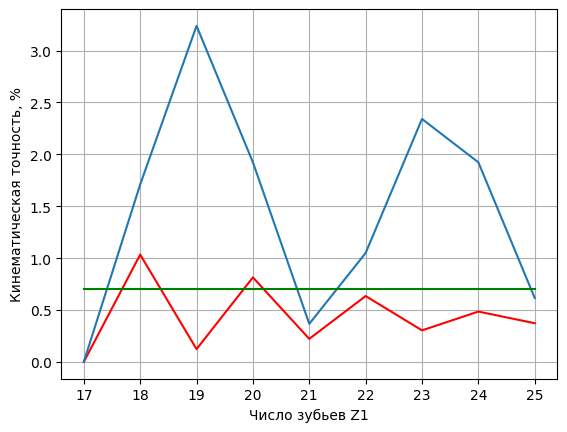

Z1 = 25
Z2 = 19
Z3 = 63


In [3]:
# Кинематический расчет
i_pl = n_a/n_h
i_pl

print("U =", i_pl)

accurate = 0.007

z_1 = 13
res = 0
mass_sol = []
x_mass = []
err_1_mass = []
err_2_mass = []
acc_mass = []

while res == 0:
    z_3 = z_1*(i_pl-1)
    z_2 = 0.5*(z_3-z_1)

    err_1 = abs(z_3 - round(z_3))/z_3
    err_2 = abs(z_2 - round(z_2))/z_2
    x_mass.append(z_1)
    err_1_mass.append(err_1*100)
    err_2_mass.append(err_2*100)
    acc_mass.append(accurate*100)
    sol = [z_1, z_2, z_3, err_1, err_2]
    mass_sol.append(sol)

    if abs(z_3 - round(z_3))/z_3 <accurate and abs(z_2 - round(z_2))/z_2 < accurate and z_2>=17 and z_3>=17:
        res = 1
    else:
        z_1 += 1

z_2 = round(z_2)
z_3 = round(z_3)

plt.plot(x_mass, err_1_mass, "red")
plt.plot(x_mass, err_2_mass)
plt.plot(x_mass, acc_mass, "green")
plt.xlabel("Число зубьев Z1")
plt.ylabel("Кинематическая точность, %")
plt.grid()
plt.show()
print("Z1 =", z_1)
print("Z2 =", round(z_2))
print("Z3 =", round(z_3))

In [4]:
# Проверка по условию соседства
a_c = (0.9*PI)/math.asin((i_pl-2)/i_pl)
a_c = math.floor(a_c)
a_c

6

In [5]:
# Материал 

# Для материала зубчатых колес принимаем сталь 20Х с цементацией и закалкой. 
# Заготовка – прокат

sigma_F_lim_b = 1500
Y_R = 1
Y_Z = 1
Y_d = 1
Y_g = 1
Y_A = 0.75
S_F = 1.65
N_FG = 4*10**6
q_F = 9
K_FE = 0.1
N_FE = 0.1*60*a_c*n_h*t_h
Y_N = 1

sigma_H_lim_b = 1800
Z_R = 1
Z_V = 1
S_H = 1.2
N_HG = 12*10**7
K_HE = 0.25
N_HE = 0.25*60*4*n_h*t_h
Z_N = 1

In [6]:
%%render

sigma_F = (sigma_F_lim_b*Y_R*Y_Z*Y_d*Y_g)/S_F *Y_A * Y_N #МПа

sigma_H = (sigma_H_lim_b*Z_R*Z_V)/S_H * Z_N #МПа

<IPython.core.display.Latex object>

In [7]:
# Определение размеров колес

K_d = 760
T_a = 9550 * (P_a/n_a) * 1000
T = (T_a * 1.1)/a_c
K_Hb = 1
K_r = 1.2
psi_bd = 0.8

K_m = 13.4
k_Fb = 1
Y_F1 = 4

In [8]:
%%render

d_1H = K_d*((T*K_r*K_Hb*(i_pl+1)) / (i_pl*a_c*psi_bd*sigma_H**2))**(1/3)

m_H = d_1H/z_1

<IPython.core.display.Latex object>

In [9]:
%%render

m_F = K_m*((T*K_r*k_Fb*Y_F1) / (z_1**2*a_c*psi_bd*sigma_F))**(1/3)

<IPython.core.display.Latex object>

In [10]:
m_mass = [1, 1.25, 1.5, 2, 2.5, 3, 4, 5, 6, 8, 10, 12, 16, 25, 32, 40]
m_max = max([m_H, m_F])
m = 0
for i in range(len(m_mass)):
    if m_max>m_mass[i]:
        m = m_mass[i+1]
        pass

print("Расчитанный модуль зуба равен m =", m)

Расчитанный модуль зуба равен m = 10


In [11]:
%%render

d_1 = m*z_1
d_2 = m*z_2
d_3 = m*z_3

b = psi_bd*d_1


<IPython.core.display.Latex object>